In [1]:
import json 
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import time
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
from pandas import DataFrame
import numpy as np
import urllib.request
import requests
import os
import io
import robin_stocks as robin

In [2]:
f=open("../authentication/account.txt","r")
lines=f.readlines()
username=lines[0].strip()
password=lines[1].strip()
f.close()
login = robin.login(username,password)

In [68]:
robin.get_stock_historicals??

In [69]:
rsi=robin.get_stock_historicals('bili', interval='10minute',bounds='regular',span='week')
def Reverse(lst): 
    return [ele for ele in reversed(lst)]
len(rsi)

156

In [70]:
begins_at=[]
open_price=[]
close_price=[]
high_price=[]
low_price=[]
volume=[]
session=[]
interpolated=[]
symbol=[]
for rs in rsi:
    begins_at.append((rs['begins_at']))
    open_price.append(float(rs['open_price']))
    close_price.append(float(rs['close_price']))
    high_price.append(float(rs['high_price']))
    low_price.append(float(rs['low_price']))
    volume.append(float(rs['volume']))
    session.append((rs['session']))
    interpolated.append(float(rs['interpolated']))
    symbol.append((rs['symbol']))



In [71]:
df=pd.DataFrame(list(zip(begins_at,open_price,close_price,high_price,low_price,volume,session,interpolated,symbol))
                ,columns=['begins_at','open_price','close_price','high_price',
                         'low_price','volume','session','interpolated','symbol'])

In [72]:
df=df[df['session']=='reg']

In [73]:
df.head()

,begins_at,open_price,close_price,high_price,low_price,volume,session,interpolated,symbol
0,2021-02-12T14:30:00Z,144.98,150.250,151.960,144.7000,191914.0,reg,0.0,BILI
1,2021-02-12T14:40:00Z,150.05,153.430,153.500,149.7117,121961.0,reg,0.0,BILI
2,2021-02-12T14:50:00Z,153.31,152.360,154.120,151.6106,74001.0,reg,0.0,BILI
3,2021-02-12T15:00:00Z,152.63,153.760,154.500,152.6300,79319.0,reg,0.0,BILI
4,2021-02-12T15:10:00Z,153.85,153.165,154.665,152.8200,56686.0,reg,0.0,BILI


In [74]:
df['change_down'] = np.where(df['open_price']>=df['close_price'], df['open_price']-df['close_price'], 0)
df['change_up'] = np.where(df['open_price']<df['close_price'], df['close_price']-df['open_price'], 0)
df['SMA_UP'] = df.iloc[:,9].rolling(window=3).mean()
df['SMA_DOWN'] = df.iloc[:,10].rolling(window=3).mean()
length=len(df)

In [86]:
start_sma_up=df.iloc[2,11]
start_sma_down=df.iloc[2,12]
df["SMMA_UP"]= (df['change_up']+(start_sma_up*(length-1))/length)
df["SMMA_DOWN"]= (df['change_down']+(start_sma_down*(length-1))/length)
df_df=df.dropna()

for index,val in enumerate(df_df['SMMA_UP']):
    try:
        df_df.iloc[index+1,13]=(df_df.iloc[index+1,10]+(df_df.iloc[index,13]*(len(df_df['SMMA_UP'])-1))/6)     
    except:
        continue
for index,val in enumerate(df_df['SMMA_DOWN']):
    try:
        df_df.iloc[index+1,14]=(df_df.iloc[index+1,9]+(df_df.iloc[index,14]*(len(df_df['SMMA_DOWN'])-1))/6)     
    except:
        continue
df_df['RS']=df_df['SMMA_UP']/df_df['SMMA_DOWN']
rsi_list=[]
for indx,rs in enumerate(df_df['RS']):
    rsi_=100-(100/(1+np.mean(df_df.iloc[indx:indx+5,1])))
    rsi_list.append(rsi_)

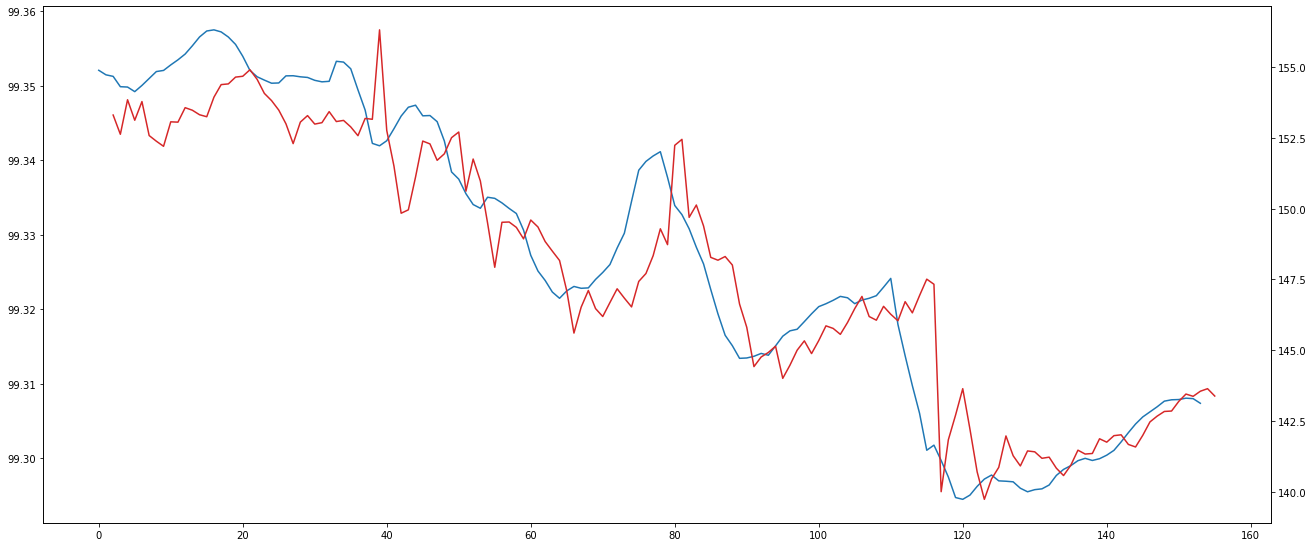

In [87]:
#Create some mock data
fig, ax1 = plt.subplots()
fig.set_size_inches(22, 9.5)
#ax1.plot(df_['RS'])
ax1.plot(rsi_list)
ax2 = ax1.twinx()
ax2.plot(df_df['open_price'],color = 'tab:red')
plt.show()